In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def get_data(data_type, start_year, end_year=2020):
    website = 'https://api.collegefootballdata.com/' + data_type   
    frames = [pd.read_json((website + '?year=%d&seasonType=both' % end_year))]
    for year in range(start_year, end_year):
        frames.append(pd.read_json((website + '?year=%d&seasonType=both' % year)))
    return pd.concat(frames)

In [29]:
original_games = get_data('games', 1980)
original_records = get_data('records', 1980)

In [39]:
games = original_games
games = games.assign(result = (games.home_points-games.away_points))
games = games.loc[:, games.columns.intersection(['season', 'home_team', 'away_team', 'result'])]

records = original_records
records = records.assign(percentage = [d.get('wins') / d.get('games') for d in records.total])
records = records.loc[:, records.columns.intersection(['year','team', 'percentage'])]

games = pd.merge(games, records.rename(columns={'percentage': 'home_percentage'}), how='left', left_on=['season', 'home_team'], right_on=['year', 'team']).drop(['team', 'year'], axis=1)
games = pd.merge(games, records.rename(columns={'percentage': 'away_percentage'}), how='left', left_on=['season', 'away_team'], right_on=['year', 'team']).drop(['team', 'year'], axis=1)
games = games.dropna()
games = games.assign(percent_difference = (games.home_percentage-games.away_percentage))
games = games.drop(['home_percentage', 'away_percentage'], axis=1)

In [51]:
valid = games.loc[games['season'] == 2019]
train = games.loc[games['season'] != 2019]

In [54]:
train_in = train.percent_difference.to_numpy()
train_out = train.result.to_numpy()
valid_in = valid.percent_difference.to_numpy()
valid_out = valid.result.to_numpy()
model = LinearRegression().fit(input.reshape(-1, 1), output)

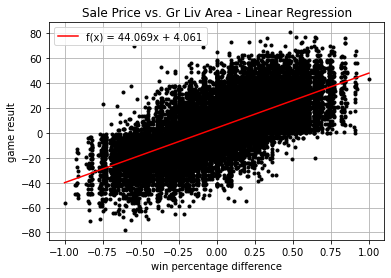

In [55]:
x = np.linspace(-1, 1, 500)
y = model.coef_[0] * x + model.intercept_

plt.xlabel('win percentage difference')
plt.ylabel('game result')
plt.plot(input, output, '.', color='black')
plt.plot(x, y, '-r', label="f(x) = %.3fx + %.3f" % (model.coef_[0], model.intercept_))
plt.legend()
plt.title('Sale Price vs. Gr Liv Area - Linear Regression')
plt.grid()

In [57]:
prediction = model.predict(valid_in.reshape(-1, 1))
print('RMSE = %.2f points' % mean_squared_error(valid_out, prediction, squared=False))

RMSE = 15.80 points
